In [1]:
import basedosdados as bd
import pandas as pd
import matplotlib as plt
from statistics import mean

# Queries

# Índice de Desenvolvimento da Educação Básica por município
ideb_municipio = '''
SELECT id_municipio, avg(ideb) as ideb_municipio
FROM `basedosdados.br_inep_ideb.municipio`
GROUP BY id_municipio
'''

# Indicadores de desigualdade econômica por municipio
indicadores_adh = '''
SELECT id_municipio, avg(prop_pobreza) as prop_pobreza,
        avg(idhm_r) as idhm_r
FROM `basedosdados.mundo_onu_adh.municipio`
GROUP BY id_municipio
'''


In [2]:
idebMunicipioDf = bd.read_sql(ideb_municipio, billing_project_id="ps-analytica-a2-416401")

Downloading: 100%|█████████████████████| 5570/5570 [00:00<00:00, 11668.20rows/s]


In [3]:
indicadoresADHDf = bd.read_sql(indicadores_adh, billing_project_id="ps-analytica-a2-416401")

Downloading: 100%|██████████████████████| 5565/5565 [00:00<00:00, 7739.09rows/s]


In [4]:
ideb_adh = idebMunicipioDf.merge(indicadoresADHDf, left_on='id_municipio', right_on='id_municipio', how='inner')

ranges = {'3-4': [], '4-5': [], '5-6': []}

for indice, dado in ideb_adh.iterrows():
    if dado['ideb_municipio'] < 3:
        continue
    if dado['ideb_municipio'] < 4:
        ranges['3-4'].append(dado['prop_pobreza'])
    elif dado['ideb_municipio'] < 5:
        ranges['4-5'].append(dado['prop_pobreza'])
    elif dado['ideb_municipio'] <= 6:
        ranges['5-6'].append(dado['prop_pobreza'])

propMunicipios3_6 = (len(ranges['3-4']) + len(ranges['4-5']) + len(ranges['5-6'])) / len(ideb_adh)
print('Estas faixas contemplam %.2f%% dos municípios' % (propMunicipios3_6 * 100))
print(len(ranges['3-4']), len(ranges['4-5']), len(ranges['5-6']))

Estas faixas contemplam 98.76% dos municípios
1700 2439 1357


<Axes: xlabel='Faixa do ideb', ylabel='Proporção de pobres'>

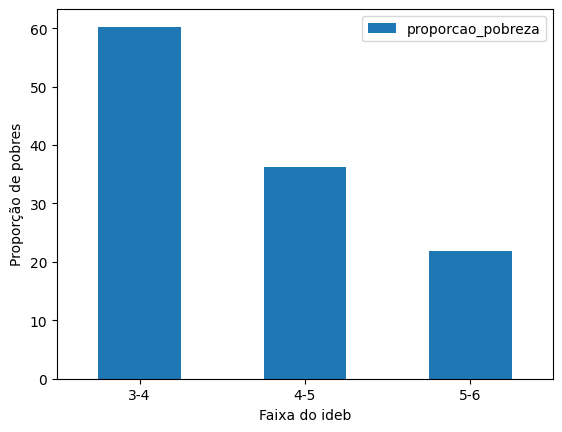

In [5]:
propPobreza_faixaIdebDf = pd.DataFrame({'faixa': ranges.keys(), 'proporcao_pobreza': map(mean, ranges.values())})
propPobreza_faixaIdebDf.plot.bar(xlabel='Faixa do ideb', ylabel='Proporção de pobres', x='faixa', rot=0)

In [6]:
ideb_adh

,id_municipio,ideb_municipio,indice_gini,prop_pobreza,idhm_r
0,1200328,3.816327,0.606667,84.746667,0.387667
1,1200344,3.858974,0.620000,62.196667,0.504667
2,1200351,3.452941,0.566667,77.640000,0.411667
3,1200393,3.400000,0.523333,70.043333,0.443000
4,1200435,3.200000,0.580000,81.046667,0.418667
...,...,...,...,...,...
5560,3521101,5.219048,0.480000,12.100000,0.692000
5561,3556602,5.133333,0.490000,14.293333,0.673000
5562,4123824,4.714286,0.520000,35.836667,0.603667
5563,4115853,5.519048,0.450000,16.600000,0.667667


<Axes: xlabel='Ideb do Município', ylabel='IDH Municipal - Renda'>

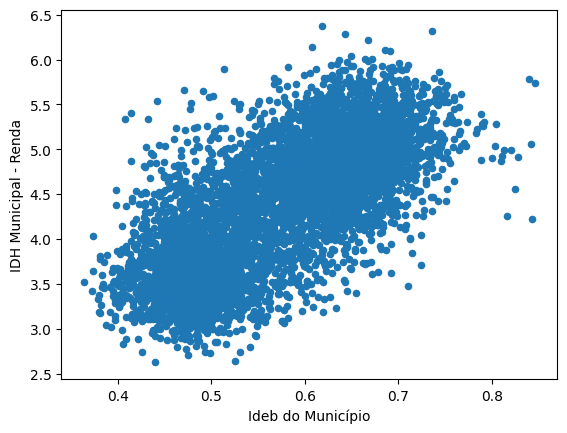

In [8]:
ideb_adh.plot.scatter(xlabel='Ideb do Município', ylabel='IDH Municipal - Renda', x='idhm_r', y='ideb_municipio')